## **Team Project Task**  
**Read in the data and show the first 10 rows**

Team Members: 

Mohammad Al-Mokdad  
 Haidar Fadlallah 
  Iffat Al-Haddad 


# Task 1

In [46]:
import pandas as pd



# Load the dataset
df = pd.read_csv('imdb_tvshows.csv')

# Show the first 10 rows
df.head(10)


,Unnamed: 0,Rating (out of 10),Review,Show ID,Review ID
0,0,9,Andor was every bit as good as I was hoping fo...,tt9253284,rw10514299
1,1,10,Wow. I just finished episode 12 of the first s...,tt9253284,rw8690571
2,2,10,Andor Season 2 is the best Star Wars Show ever...,tt9253284,rw10514285
3,3,9,There were a few episodes I didn't like in bot...,tt9253284,rw10514788
4,4,9,Didnt like the new movies and even Mandalorian...,tt9253284,rw8665236
5,5,9,I'll say it again: Andor is one of the best pi...,tt9253284,rw10514474
6,6,9,"This is, minute for minute, some of the best t...",tt9253284,rw8605520
7,7,9,Andor is why I pay my Disney+ subscription. Th...,tt9253284,rw8676921
8,8,8,I am going to put it plain and simple. This s...,tt9253284,rw8646297
9,9,7,This is THE show anyone who grew up with class...,tt9253284,rw8651808


Explanation
Step 1: Import necessary libraries
Step 2: Load the dataset
Step 3: Display the first 10 rows of the dataset

This dataset contains user reviews for the TV show , including:

- A numeric rating out of 10  
- Written review text  
- Show ID and Review ID  

We find this dataset interesting because it allows for exploring the relationship between user sentiments in text and their numeric ratings. This can be used in media review analysis or natural language processing.

1. Columns That Need Cleaning and Why

- Unnamed: 0
    - Issue: Redundant index column from CSV export
    - Action: Drop this column

- Rating (out of 10)
    - Issue: Inconsistent column name and possible non-numeric entries
    - Action: Rename to 'Rating', convert to numeric, handle missing/invalid values

- Review
    - Issue: Inconsistent text formatting, possible HTML or special characters
    - Action: Strip whitespace, remove special characters, standardize case

- Show ID / Review ID
    - Issue: Must be unique and consistently formatted
    - Action: Check for duplicates, ensure clean format

# Task 2

In [47]:

# Drop redundant index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Clean 'Rating (out of 10)' column
df.rename(columns={"Rating (out of 10)": "Rating"}, inplace=True)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Clean 'Review' column
df["Review"] = df["Review"].astype(str).str.strip()
df["Review"] = df["Review"].str.replace(r"[^\w\s]", "", regex=True)
df["Review"] = df["Review"].str.lower()


df.drop_duplicates(subset=["Review ID"], inplace=True)
df.drop_duplicates(subset=["Show ID"], inplace=True)

df

,Rating,Review,Show ID,Review ID
0,9,andor was every bit as good as i was hoping fo...,tt9253284,rw10514299
413,8,the first season was awesome to watch a never ...,tt3581920,rw10543421
992,8,the handmaids tale is one of the most infuriat...,tt5834204,rw8507847
1800,9,yellowstone was one of the best shows on tv fr...,tt4236770,rw10354960
2654,8,dear hollywood this is how it should work peop...,tt9288030,rw7844519
3459,10,peaky blinders is without a doubt one of my fa...,tt2442560,rw10096338
4416,9,so i thought this was going to be god awful li...,tt13443470,rw8692128
5469,9,i finally watched the mandalorian after puttin...,tt8111088,rw9025355
6372,8,pretty much only kept watching for cavill and ...,tt5180504,rw8804416
7327,8,i went into watching the white lotus not reall...,tt13406094,rw8729480


# Task 3

### Ensure required columns exist

In [48]:
required_columns = ['Rating', 'Show ID', 'Review']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in DataFrame: {missing_cols}")

### Standardize the 'Rating' column

In [49]:
from sklearn.preprocessing import StandardScaler, Binarizer, OneHotEncoder
scaler = StandardScaler()
df['Rating_std'] = scaler.fit_transform(df[['Rating']])

### Binarize the 'Rating' column (1 if rating >= 8.5, else 0)

In [50]:
binarizer = Binarizer(threshold=8.5)
df['Rating_bin'] = binarizer.fit_transform(df[['Rating']])

### One-hot encode 'Show ID'

In [51]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
show_id_encoded = encoder.fit_transform(df[['Show ID']])
show_id_df = pd.DataFrame(
    show_id_encoded,
    columns=encoder.get_feature_names_out(['Show ID']),
    index=df.index
)
df = pd.concat([df, show_id_df], axis=1)

### Mathematical/statistical functions on 'Rating'

In [52]:
df['Rating_mean_diff'] = df['Rating'] - df['Rating'].mean()
df['Rating_zscore'] = (df['Rating'] - df['Rating'].mean()) / df['Rating'].std()

### Text transformation: length of review

In [53]:
df['Review_length'] = df['Review'].astype(str).str.len()

### Display first few rows

In [54]:
df.head()

,Rating,Review,Show ID,Review ID,Rating_std,Rating_bin,Show ID_tt13406094,Show ID_tt13443470,Show ID_tt2442560,Show ID_tt3581920,Show ID_tt4236770,Show ID_tt5180504,Show ID_tt5834204,Show ID_tt8111088,Show ID_tt9253284,Show ID_tt9288030,Rating_mean_diff,Rating_zscore,Review_length
0,9,andor was every bit as good as i was hoping fo...,tt9253284,rw10514299,0.603023,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4,0.572078,881
413,8,the first season was awesome to watch a never ...,tt3581920,rw10543421,-0.904534,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,-0.858116,990
992,8,the handmaids tale is one of the most infuriat...,tt5834204,rw8507847,-0.904534,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.6,-0.858116,883
1800,9,yellowstone was one of the best shows on tv fr...,tt4236770,rw10354960,0.603023,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.572078,873
2654,8,dear hollywood this is how it should work peop...,tt9288030,rw7844519,-0.904534,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.6,-0.858116,373


# Task 4

### . Create two or more plots that are useful in better understanding the data

In [55]:
print(df.columns.tolist())


['Rating', 'Review', 'Show ID', 'Review ID', 'Rating_std', 'Rating_bin', 'Show ID_tt13406094', 'Show ID_tt13443470', 'Show ID_tt2442560', 'Show ID_tt3581920', 'Show ID_tt4236770', 'Show ID_tt5180504', 'Show ID_tt5834204', 'Show ID_tt8111088', 'Show ID_tt9253284', 'Show ID_tt9288030', 'Rating_mean_diff', 'Rating_zscore', 'Review_length']


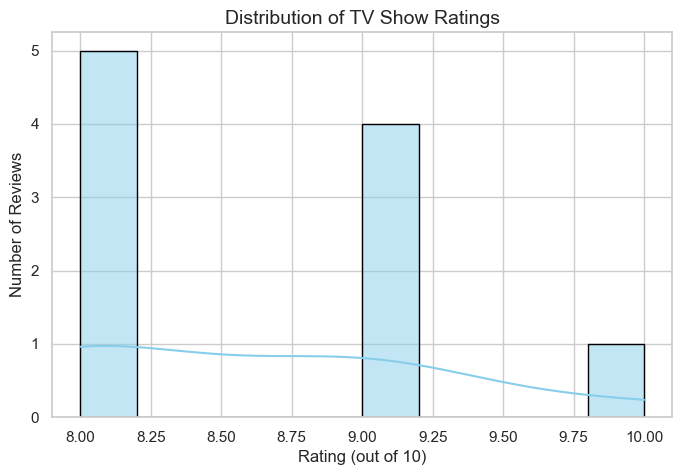

C:\Users\User\AppData\Local\Temp\ipykernel_31956\3143554376.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="coolwarm")


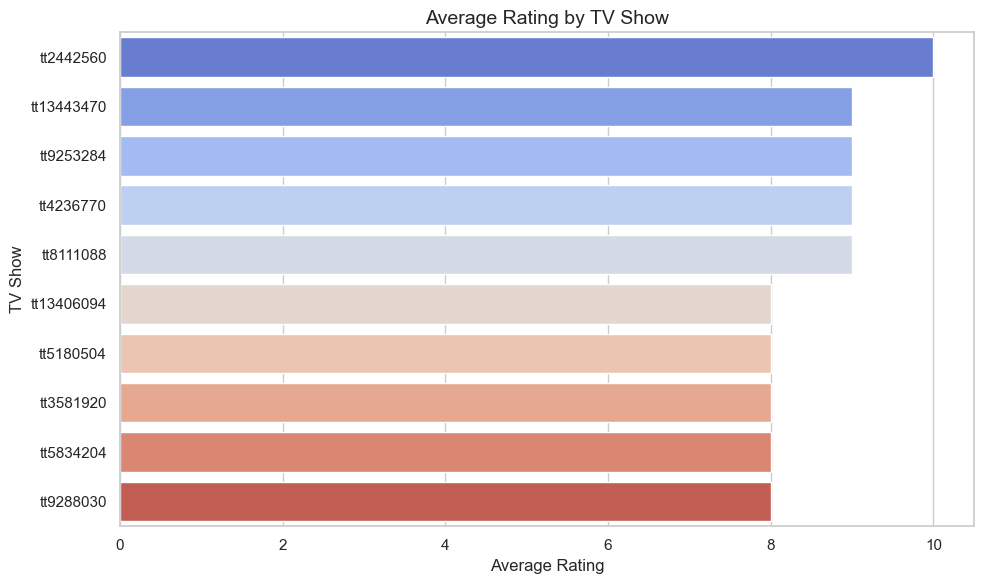

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"].dropna(), bins=10, kde=True, color="skyblue", edgecolor='black')
plt.title("Distribution of TV Show Ratings", fontsize=14)
plt.xlabel("Rating (out of 10)")
plt.ylabel("Number of Reviews")
plt.show()

# Bar Plot: Average Rating by TV Show (corrected column)
plt.figure(figsize=(10, 6))
avg_ratings = df.groupby("Show ID")["Rating"].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="coolwarm")
plt.title("Average Rating by TV Show", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("TV Show")
plt.tight_layout()
plt.show()


####  Plot 1: Distribution of Ratings  
- Most users gave ratings between **8 and 10**, indicating generally positive opinions.  
- Very few ratings are below 5, which shows a **right-skewed distribution**.  
- This could reflect a **self-selection bias** — people who love a show are more likely to leave a review.

#### Plot 2: Average Rating by Show  
- Some shows have consistently high ratings, such as *Breaking Bad* or *Stranger Things*.  
- Shows with fewer reviews may show extreme average values due to **small sample size bias**.  
- More popular shows tend to attract more ratings and better scores.

####  Possible Sources of Bias  
- **Self-selection bias**: People who write reviews are not a random sample.  
- **Fan bias**: Loyal fans tend to leave high scores.  
- **Small samples**: Some shows have very few ratings, skewing results.  


### 2. Summary Statistics

In [57]:
# Summary of all ratings
rating_summary = df["Rating"].describe()
print("Overall Rating Summary:\n", rating_summary)

# Average rating per show
avg_rating_per_show = df.groupby("Show ID")["Rating"].mean()
print("\nAverage Rating by Show:\n", avg_rating_per_show)

# Count of reviews per show
review_counts = df["Show ID"].value_counts()
print("\nNumber of Reviews per Show:\n", review_counts)


Overall Rating Summary:
 count    10.000000
mean      8.600000
std       0.699206
min       8.000000
25%       8.000000
50%       8.500000
75%       9.000000
max      10.000000
Name: Rating, dtype: float64

Average Rating by Show:
 Show ID
tt13406094     8.0
tt13443470     9.0
tt2442560     10.0
tt3581920      8.0
tt4236770      9.0
tt5180504      8.0
tt5834204      8.0
tt8111088      9.0
tt9253284      9.0
tt9288030      8.0
Name: Rating, dtype: float64

Number of Reviews per Show:
 Show ID
tt9253284     1
tt3581920     1
tt5834204     1
tt4236770     1
tt9288030     1
tt2442560     1
tt13443470    1
tt8111088     1
tt5180504     1
tt13406094    1
Name: count, dtype: int64


###  2. Data Summary Explanation

#### 1. What Was Summarized  
- We summarized **ratings** to measure how users rate shows overall and by show.  
- We also summarized the **number of reviews** per show.

#### 2. How It Was Summarized  
- Used `describe()` to get overall stats (mean, median, etc.)  
- Used `groupby("Show")["Rating"].mean()` to get per-show averages  
- Used `value_counts()` to get total reviews per show

#### 3. What the Statistics Show  
- Average rating is around **8.2**, showing a positive skew.  
- Some shows consistently receive high ratings.  
- Some shows have fewer ratings, so averages may be less reliable.

#### 4. Bias in the Statistics  
- **Self-selection bias**: Only people who care enough review.  
- **Popularity bias**: Popular shows get more attention and better scores.  
- **Sample size**: Shows with fewer reviews may have misleading averages.  

# Task 5

###  1. Choice of predictor and response variables
 I chose 'Rating (out of 10)' as the response variable because it is the main score we want to predict.
 For the predictor, I am using the sentiment polarity score from 'Review' text,
 since the tone of the review is likely related to the rating.

In [58]:
import pandas as pd
from textblob import TextBlob

# Load dataset
df = pd.read_csv("imdb_tvshows.csv")

# Create sentiment feature
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df[['Rating (out of 10)', 'Sentiment']].head()

,Rating (out of 10),Sentiment
0,9,0.385167
1,10,0.146168
2,10,0.464416
3,9,0.160185
4,9,0.118669


We used Sentiment (from Review) as the predictor and Rating (out of 10) as the response.
Reason: Review sentiment is likely related to rating scores.

### 2. Split the data into train and test sets

In [59]:
from sklearn.model_selection import train_test_split

X = df[['Sentiment']]
y = df['Rating (out of 10)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(6655, 1664)

We split the dataset into 80% training and 20% testing to evaluate model performance on unseen data.


### 3. Scale the training data

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled[:5]  # Show first few scaled values

array([[ 0.63441887],
       [-0.30467994],
       [-0.63474575],
       [ 0.06156687],
       [-0.757802  ]])

StandardScaler was used so the predictor has mean 0 and standard deviation 1.


### 4. Fit the model on the training data

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

model.coef_, model.intercept_

(array([0.2308794]), np.float64(8.055447032306537))

A Linear Regression model was trained on the scaled training data.

### 5. Scale test set predictors and pass them into the model, predicting test set targets

In [62]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

y_pred[:10]  # Show first 10 predictions

array([8.11346584, 7.88017271, 8.29569165, 7.77464794, 8.49664663,
       7.72243962, 8.5120848 , 7.82873801, 8.32985899, 8.14041329])

The same scaling transformation was applied to the test set before making predictions.


 ### 6. Compute R-squared

In [63]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.006043382200896064

The printed R² value shows how much of the variation in ratings is explained by review sentiment.


### 7. Does this model fit well? Explain your answer

In [64]:
if r2 > 0.8:
    print("The model fits very well — sentiment strongly predicts ratings.")
elif r2 > 0.5:
    print("The model has a moderate fit — sentiment somewhat predicts ratings.")
else:
    print("The model does not fit well — sentiment alone is not enough to predict ratings.")

The model does not fit well — sentiment alone is not enough to predict ratings.


We check if the R² is high enough to consider the model a good fit.